# Name:- Sojas Khandagale

# GitHub UserName:- sojas07

# USC ID:- 4955206780

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/vertebral_column_data/column_2C.dat',header=None,sep=' ')

## (b) Pre-Processing and Exploratory data analysis:

In [3]:
df.head()

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [4]:
column = ['pelvic incidence','pelvic tilt','lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis','class']
df = pd.DataFrame(columns=column,data=df.values)
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.0,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.3,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [5]:
df = df.replace('AB',1)
df = df.replace('NO',0)

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

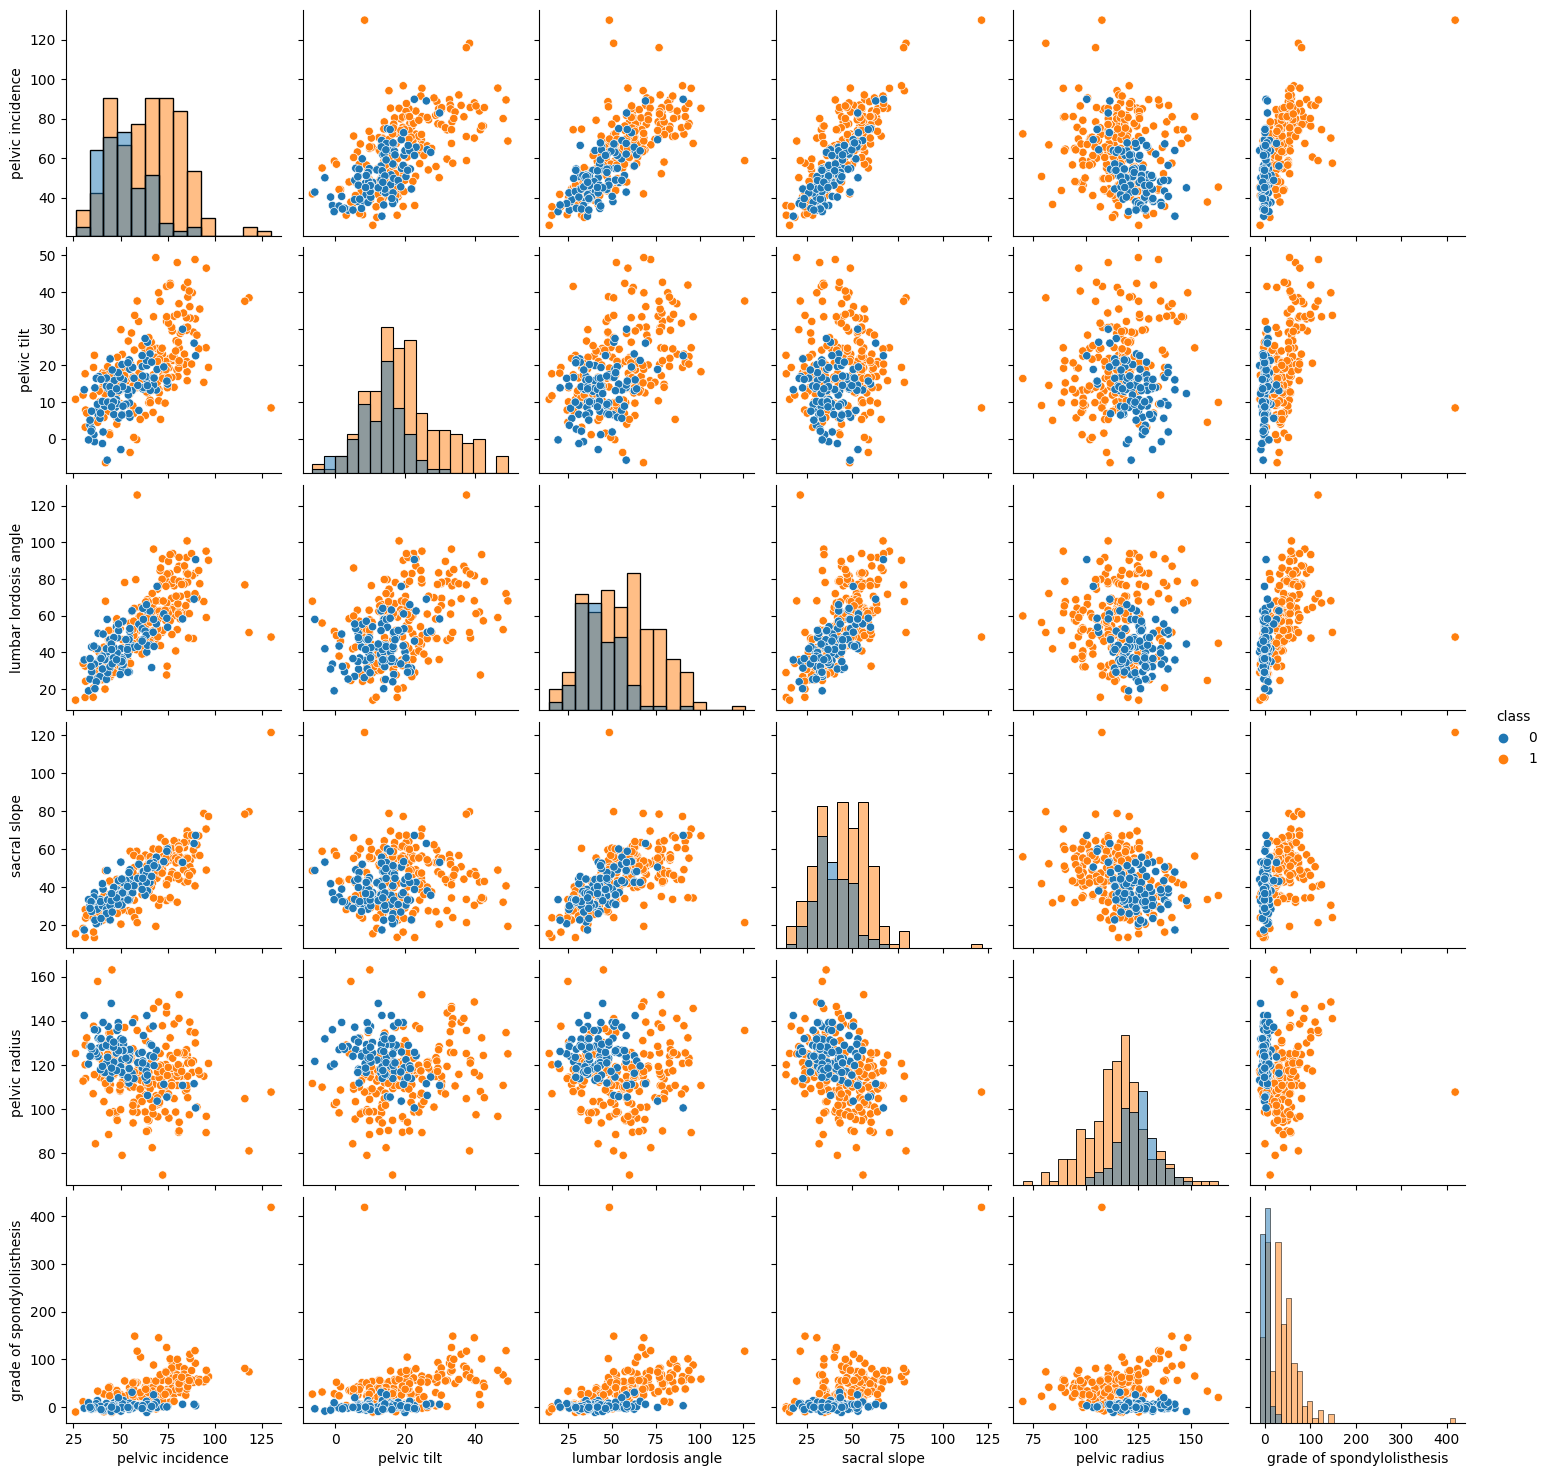

In [6]:
sns.pairplot(data=df,hue='class',diag_kind="hist")

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

<AxesSubplot: xlabel='class', ylabel='pelvic incidence'>

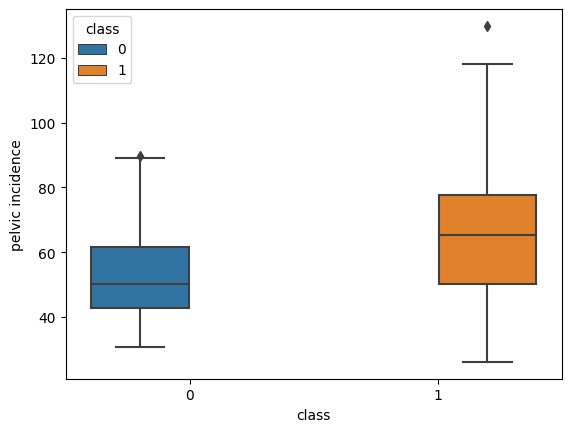

In [7]:
sns.boxplot(x='class',y='pelvic incidence',data=df,hue='class')

<AxesSubplot: xlabel='class', ylabel='pelvic tilt'>

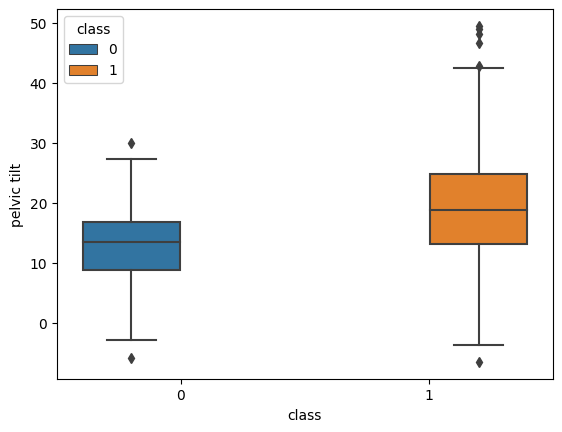

In [8]:
sns.boxplot(x='class',y='pelvic tilt',data=df,hue='class')

<AxesSubplot: xlabel='class', ylabel='lumbar lordosis angle'>

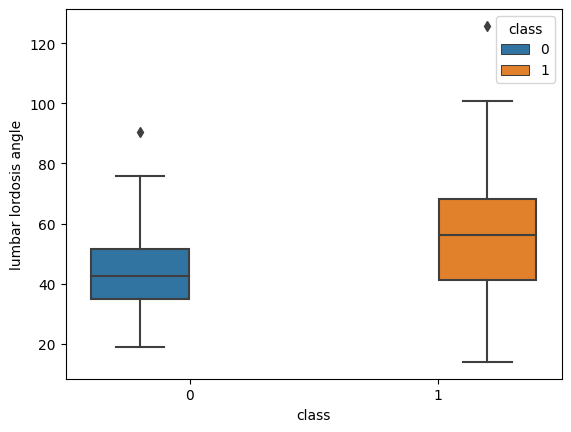

In [9]:
sns.boxplot(x='class',y='lumbar lordosis angle',data=df,hue='class')

<AxesSubplot: xlabel='class', ylabel='sacral slope'>

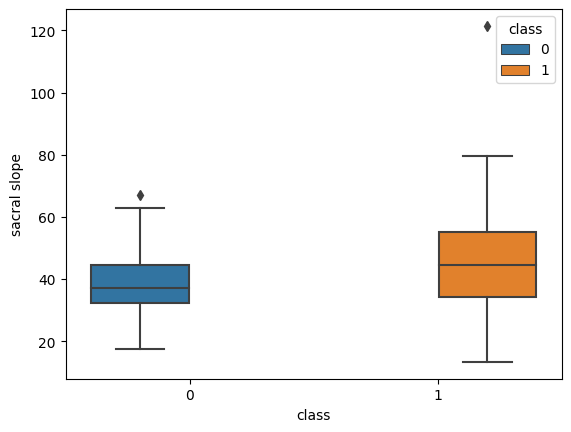

In [10]:
sns.boxplot(x='class',y='sacral slope',data=df,hue='class')

<AxesSubplot: xlabel='class', ylabel='pelvic radius'>

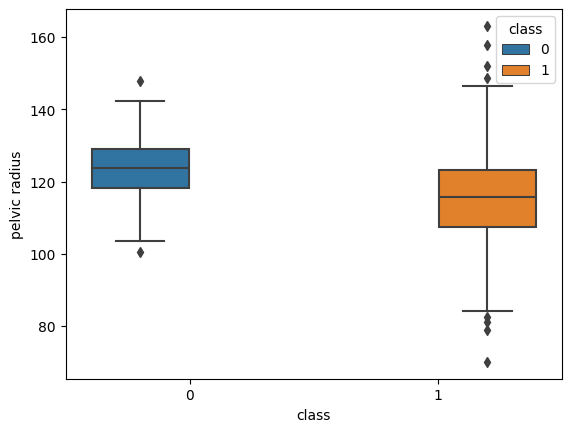

In [11]:
sns.boxplot(x='class',y='pelvic radius',data=df,hue='class')

<AxesSubplot: xlabel='class', ylabel='grade of spondylolisthesis'>

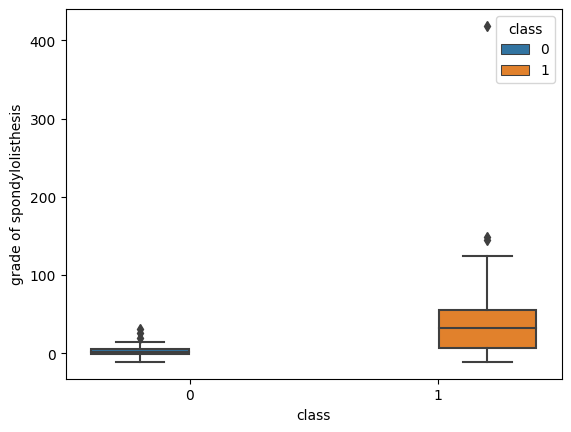

In [12]:
sns.boxplot(x='class',y='grade of spondylolisthesis',data=df,hue='class')

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [13]:
df_AB = df[df['class']==1]
df_NO = df[df['class']==0]

df_AB_train = df_AB[:140]
df_NO_train = df_NO[:70]

df_AB_test = df_AB[140:]
df_NO_test = df_NO[70:]

frames = [df_AB_train,df_NO_train]
df_train_Obtained = pd.concat(frames)

frames = [df_AB_test,df_NO_test]
df_test_Obtained = pd.concat(frames)

## (c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [14]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [15]:
X_train = df_train_Obtained.iloc[:,:6].values
y_train = df_train_Obtained.iloc[:,6:].values.ravel()
print(X_train)
print(y_train)

X_test = df_test_Obtained.iloc[:,:6].values
y_test = df_test_Obtained.iloc[:,6:].values.ravel()


[[ 63.03  22.55  39.61  40.48  98.67  -0.25]
 [ 39.06  10.06  25.02  29.   114.41   4.56]
 [ 68.83  22.22  50.09  46.61 105.99  -3.53]
 ...
 [ 65.76  13.21  44.    52.55 129.39  -1.98]
 [ 40.41  -1.33  30.98  41.74 119.34  -6.17]
 [ 48.8   18.02  52.    30.78 139.15  10.44]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
# Taking the value of K as 10

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train,y_train)
train_score=clf.score(X_train,y_train)
y_pred = clf.predict(X_test)
test_score = accuracy_score(y_test,y_pred)
train_error = 1-train_score
test_error = 1-test_score

print("The training error is : ", train_error)
print("The test error is : ", test_error)

The training error is :  0.1333333333333333
The test error is :  0.09999999999999998


ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score when k = k∗.

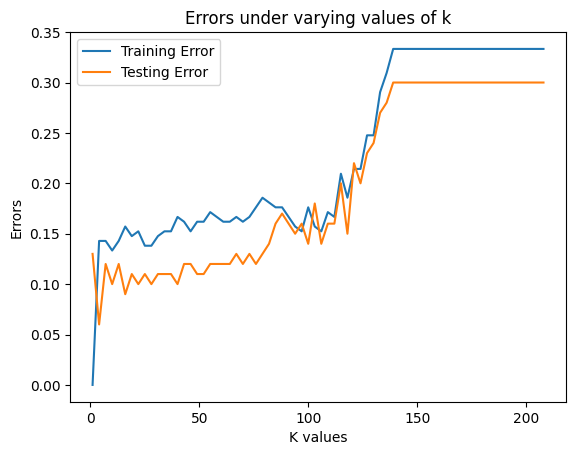

The Best value of k is :  4


In [17]:
train_errors=[]
test_errors=[]
k_values = []
Best_k_value = 0
Min_test_error = float('inf')

for k in range(208,0,-3):
  k_values.append(k)
  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train,y_train)
  train_score=clf.score(X_train,y_train)
  y_pred = clf.predict(X_test)
  test_score = accuracy_score(y_test,y_pred)
  train_errors.append(1-train_score)
  test_errors.append(1-test_score)
  if( 1-test_score< Min_test_error):
    Min_test_error = 1-test_score
    Best_k_value = k



plt.plot(k_values,train_errors,label='Training Error')
plt.legend(loc="best")
plt.plot(k_values,test_errors,label='Testing Error')
plt.legend(loc="best")
plt.xlabel('K values')
plt.ylabel('Errors')
plt.title('Errors under varying values of k') 
plt.show()

print("The Best value of k is : ",Best_k_value)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

final_knn = neighbors.KNeighborsClassifier(n_neighbors=Best_k_value)
final_knn.fit(X_train,y_train)
y_pred = final_knn.predict(X_test)
# print(classification_report(y_test,y_pred))

tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

F1_score = f1_score(y_test,y_pred)
true_positive_rate = tp/(tp+fn)
true_negative_rate = tn/(tn+fp)
Precision = precision_score(y_test,y_pred)

print("Confusion Matrix : ", confusion_matrix(y_test,y_pred))
print("True Positive rate : ",true_positive_rate)
print("True Negative rate : ",true_negative_rate)
print("Precision : ",Precision)
print("f1_score : ", F1_score)

Confusion Matrix :  [[25  5]
 [ 1 69]]
True Positive rate :  0.9857142857142858
True Negative rate :  0.8333333333333334
Precision :  0.9324324324324325
f1_score :  0.9583333333333333


iii. Since the computation time depends on the size of the training set, one may
only use a subset of the training set. Plot the best test error rate,
which is obtained by some value of k, against the size of training set, when the
size of training set is N ∈ {10, 20, 30, . . . , 210}. Note: for each N, select
your training set by choosing the first bN/3c rows of Class 0 and the first
N − bN/3c rows of Class 1 in the training set you created in 1(b)iii. Also, for
each N, select the optimal k from a set starting from k = 1, increasing by 5.
For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}.
This plot is called a Learning Curve.

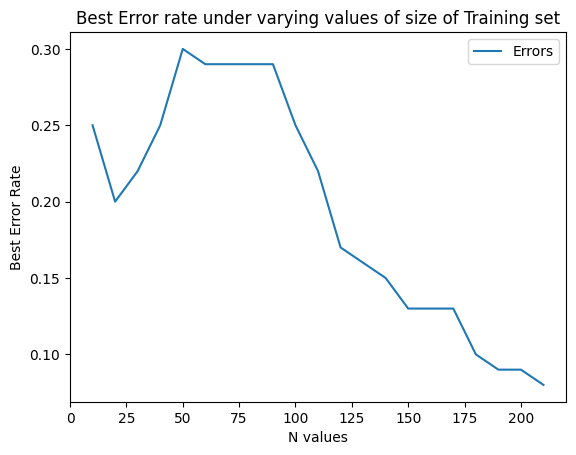

In [19]:
import math

min_test_errors = []
training_set_sizes = [n for n in range(10,211,10)]

for n in range(10,211,10):
  N_forNO = math.floor(n/3)
  N_forAB = n - math.floor(n/3)
  df_AB_train = df_AB[:N_forAB]
  df_NO_train = df_NO[:N_forNO]

  frames = [df_AB_train,df_NO_train]
  df_train = pd.concat(frames)

  X_train1 = df_train.iloc[:,:6].values
  y_train1= df_train.iloc[:,6:].values.ravel()


  train_errors=[]
  test_errors=[]
  Best_k_value = 0
  Min_test_error = float('inf')
  for k in range(1,n+1,5):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train1,y_train1)
    train_score=clf.score(X_train1,y_train1)
    y_pred = clf.predict(X_test)
    test_score = accuracy_score(y_test,y_pred)
    train_errors.append(1-train_score)
    test_errors.append(1-test_score)
    if( 1-test_score < Min_test_error):
      Min_test_error = 1-test_score
      Best_k_value = k
    
  min_test_errors.append(Min_test_error)

plt.plot(training_set_sizes,min_test_errors,label='Errors')
plt.legend(loc="best")

plt.xlabel('N values')
plt.ylabel('Best Error Rate')
plt.title('Best Error rate under varying values of size of Training set') 
plt.show()

## (d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when k = kstar) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.


In [20]:
df_AB = df[df['class']==1]
df_NO = df[df['class']==0]

df_AB_train = df_AB[:140]
df_NO_train = df_NO[:70]

df_AB_test = df_AB[140:]
df_NO_test = df_NO[70:]

frames = [df_AB_train,df_NO_train]
df_train = pd.concat(frames)

frames = [df_AB_test,df_NO_test]
df_test = pd.concat(frames)

X_train = df_train.iloc[:,:6].values
y_train = df_train.iloc[:,6:].values.ravel()

X_test = df_test.iloc[:,:6].values
y_test = df_test.iloc[:,6:].values.ravel()

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

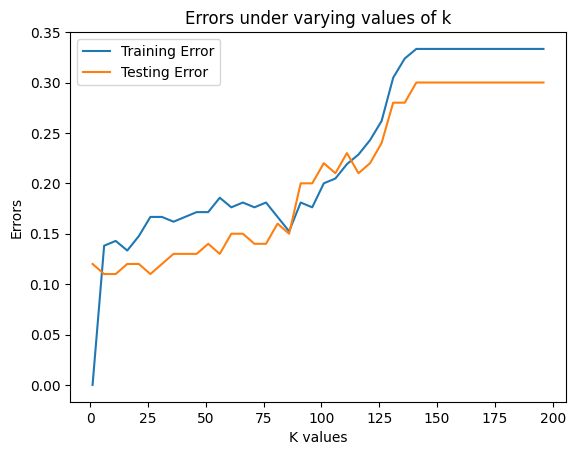

The Best value of k is :  6


In [21]:
train_errors=[]
test_errors=[]
k_values = []
Best_k_value = 0
Min_test_error = float('inf')

for k in range(1,197,5):
  k_values.append(k)
  clf = neighbors.KNeighborsClassifier(n_neighbors=k,p=1,metric='minkowski')
  clf.fit(X_train,y_train)
  train_score=clf.score(X_train,y_train)
  y_pred = clf.predict(X_test)
  test_score = accuracy_score(y_test,y_pred)
  train_errors.append(1-train_score)
  test_errors.append(1-test_score)
  if( 1-test_score< Min_test_error):
    Min_test_error = 1-test_score
    Best_k_value = k


plt.plot(k_values,train_errors,label='Training Error')
plt.legend(loc="best")
plt.plot(k_values,test_errors,label='Testing Error')
plt.legend(loc="best")
plt.xlabel('K values')
plt.ylabel('Errors')
plt.title('Errors under varying values of k') 
plt.show()

print("The Best value of k is : ",Best_k_value)

B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

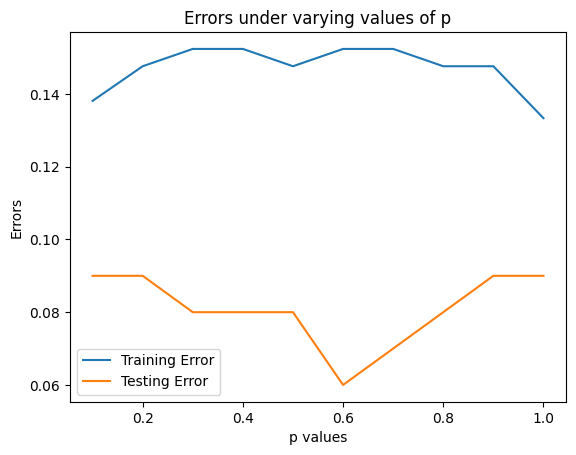

The Best p value is :  0.6


In [22]:
train_errors=[]
test_errors=[]
Min_test_error = float('inf')
p_values = [n for n in np.arange(0.1,1.1,0.1)]
best_p_value = 0

for n in np.arange(0.1,1.1,0.1):
  p_value = pow(10,n)
  clf = neighbors.KNeighborsClassifier(n_neighbors=Best_k_value,p=p_value,metric='minkowski')
  clf.fit(X_train,y_train)
  train_score=clf.score(X_train,y_train)
  y_pred = clf.predict(X_test)
  test_score = accuracy_score(y_test,y_pred)
  train_errors.append(1-train_score)
  test_errors.append(1-test_score)
  if( 1-test_score< Min_test_error):
    Min_test_error = 1-test_score
    best_p_value = p_value

plt.plot(p_values,train_errors,label='Training Error')
plt.legend(loc="best")
plt.plot(p_values,test_errors,label='Testing Error')
plt.legend(loc="best")
plt.xlabel('p values')
plt.ylabel('Errors')
plt.title('Errors under varying values of p') 
plt.show()
print("The Best p value is : ", math.log10(best_p_value))

C. which becomes Chebyshev Distance with p → ∞

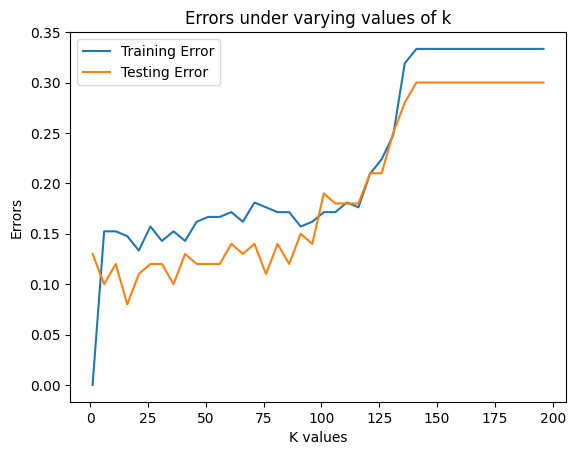

The Best value of k is :  16
The Best Test error is :  0.07999999999999996


In [23]:
train_errors=[]
test_errors=[]
k_values = []
Best_k_value = 0
Min_test_error = float('inf')

for k in range(1,197,5):
  k_values.append(k)
  clf = neighbors.KNeighborsClassifier(n_neighbors=k,p=float('inf'),metric='minkowski')
  clf.fit(X_train,y_train)
  train_score=clf.score(X_train,y_train)
  y_pred = clf.predict(X_test)
  test_score = accuracy_score(y_test,y_pred)
  train_errors.append(1-train_score)
  test_errors.append(1-test_score)
  if( 1-test_score< Min_test_error):
    Min_test_error = 1-test_score
    Best_k_value = k


plt.plot(k_values,train_errors,label='Training Error')
plt.legend(loc="best")
plt.plot(k_values,test_errors,label='Testing Error')
plt.legend(loc="best")
plt.xlabel('K values')
plt.ylabel('Errors')
plt.title('Errors under varying values of k') 
plt.show()

print("The Best value of k is : ",Best_k_value)
print("The Best Test error is : ", Min_test_error)

ii. Mahalanobis Distance.

Referred Resourses
https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics

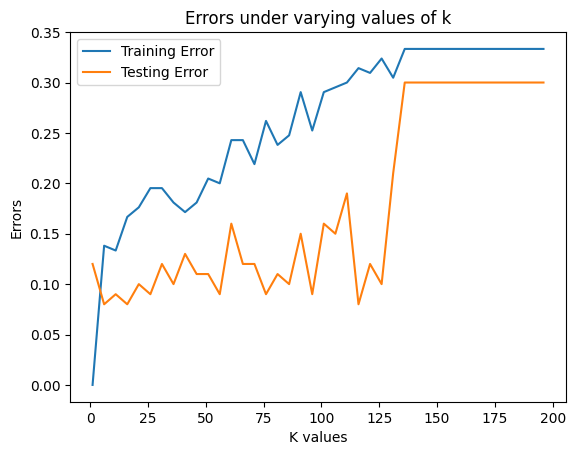

The Best value of k is :  6
The Best Test error is :  0.07999999999999996


In [24]:
df_AB = df[df['class']==1]
df_NO = df[df['class']==0]

df_AB_train = df_AB[:140]
df_NO_train = df_NO[:70]

df_AB_test = df_AB[140:]
df_NO_test = df_NO[70:]

frames = [df_AB_train,df_NO_train]
df_train = pd.concat(frames)

frames = [df_AB_test,df_NO_test]
df_test = pd.concat(frames)

X_train = df_train.iloc[:,:6].values
y_train = df_train.iloc[:,6:].values.ravel()

X_test = df_test.iloc[:,:6].values
y_test = df_test.iloc[:,6:].values.ravel()

train_errors=[]
test_errors=[]
k_values = []
Best_k_value = 0
Min_test_error = float('inf')

for k in range(1,197,5):
  k_values.append(k)
  clf = neighbors.KNeighborsClassifier(n_neighbors=k,metric='mahalanobis',metric_params={'VI': np.cov(X_train,rowvar=False)})
  clf.fit(X_train,y_train)
  train_score=clf.score(X_train,y_train)
  y_pred = clf.predict(X_test)
  test_score = accuracy_score(y_test,y_pred)
  train_errors.append(1-train_score)
  test_errors.append(1-test_score)
  if( 1-test_score< Min_test_error):
    Min_test_error = 1-test_score
    Best_k_value = k


plt.plot(k_values,train_errors,label='Training Error')
plt.legend(loc="best")
plt.plot(k_values,test_errors,label='Testing Error')
plt.legend(loc="best")
plt.xlabel('K values')
plt.ylabel('Errors')
plt.title('Errors under varying values of k') 
plt.show()

print("The Best value of k is : ",Best_k_value)
print("The Best Test error is : ", Min_test_error)

## (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.


i. Euclidean Distance

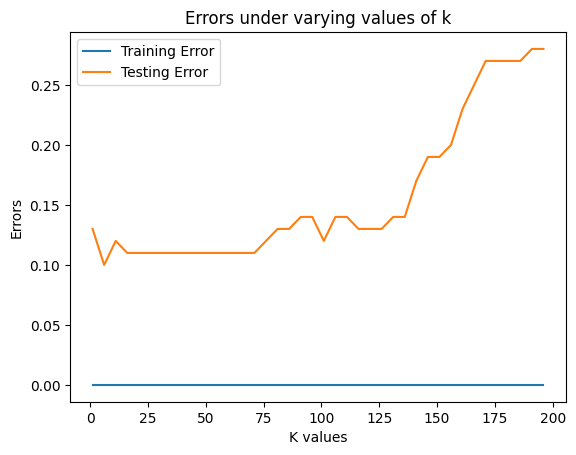

The Best value of k is :  6
The Best Test error is :  0.09999999999999998


In [25]:
train_errors=[]
test_errors=[]
k_values = []
Best_k_value = 0
Min_test_error = float('inf')

for k in range(1,197,5):
  k_values.append(k)
  clf = neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance')
  clf.fit(X_train,y_train)
  train_score=clf.score(X_train,y_train)
  y_pred = clf.predict(X_test)
  test_score = accuracy_score(y_test,y_pred)
  train_errors.append(1-train_score)
  test_errors.append(1-test_score)
  if( 1-test_score< Min_test_error):
    Min_test_error = 1-test_score
    Best_k_value = k

plt.plot(k_values,train_errors,label='Training Error')
plt.legend(loc="best")
plt.plot(k_values,test_errors,label='Testing Error')
plt.legend(loc="best")
plt.xlabel('K values')
plt.ylabel('Errors')
plt.title('Errors under varying values of k') 
plt.show()

print("The Best value of k is : ",Best_k_value)
print("The Best Test error is : ", Min_test_error)

ii. Manhattan Distance

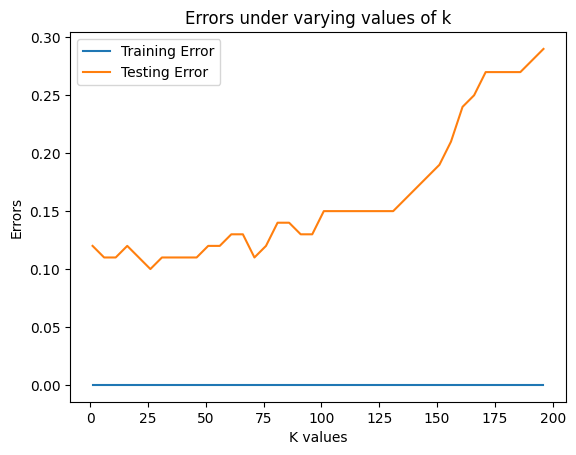

The Best value of k is :  26
The Best Test error is :  0.09999999999999998


In [26]:
train_errors=[]
test_errors=[]
k_values = []
Best_k_value = 0
Min_test_error = float('inf')

for k in range(1,197,5):
  k_values.append(k)
  clf = neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance',metric='minkowski',p=1)
  clf.fit(X_train,y_train)
  train_score=clf.score(X_train,y_train)
  y_pred = clf.predict(X_test)
  test_score = accuracy_score(y_test,y_pred)
  train_errors.append(1-train_score)
  test_errors.append(1-test_score)
  if( 1-test_score< Min_test_error):
    Min_test_error = 1-test_score
    Best_k_value = k

plt.plot(k_values,train_errors,label='Training Error')
plt.legend(loc="best")
plt.plot(k_values,test_errors,label='Testing Error')
plt.legend(loc="best")
plt.xlabel('K values')
plt.ylabel('Errors')
plt.title('Errors under varying values of k') 
plt.show()

print("The Best value of k is : ",Best_k_value)
print("The Best Test error is : ", Min_test_error)

iii. Chebyshev Distance

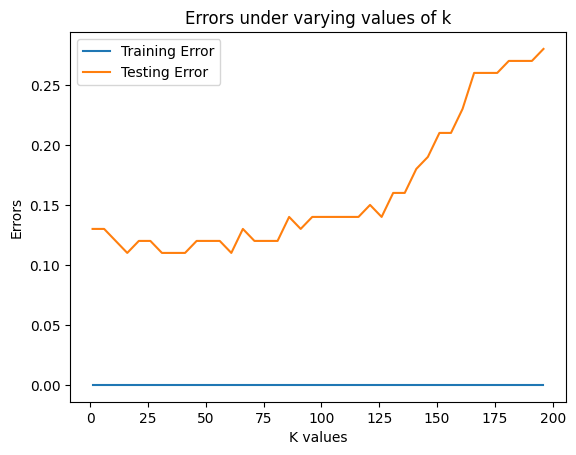

The Best value of k is :  16
The Best Test error is :  0.10999999999999999


In [27]:
train_errors=[]
test_errors=[]
k_values = []
Best_k_value = 0
Min_test_error = float('inf')

for k in range(1,197,5):
  k_values.append(k)
  clf = neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance',metric='chebyshev')
  clf.fit(X_train,y_train)
  train_score=clf.score(X_train,y_train)
  y_pred = clf.predict(X_test)
  test_score = accuracy_score(y_test,y_pred)
  train_errors.append(1-train_score)
  test_errors.append(1-test_score)
  if( 1-test_score< Min_test_error):
    Min_test_error = 1-test_score
    Best_k_value = k

plt.plot(k_values,train_errors,label='Training Error')
plt.legend(loc="best")
plt.plot(k_values,test_errors,label='Testing Error')
plt.legend(loc="best")
plt.xlabel('K values')
plt.ylabel('Errors')
plt.title('Errors under varying values of k') 
plt.show()

print("The Best value of k is : ",Best_k_value)
print("The Best Test error is : ", Min_test_error)

## (f) What is the lowest training error rate you achieved in this homework?

In [28]:
print("The Lowest Training Error rate achieved is '0'")

The Lowest Training Error rate achieved is '0'


## 2